In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv ('../artifacts/comments.csv')

In [3]:
data.head()

,comment_id,self_text
0,k70vrzb,Lol what kind of busted translator device you ...
1,k70vk4r,Translation:\n\nAmen. Kill jews and continue g...
2,k70vhew,Friendly fact reminder: Israel has been steali...
3,k70ve4h,"Well, i would never support Hamas, but there a..."
4,k70vaxh,There is absolutely evidence of Hamas taking C...


## Data Preprocessing

In [4]:
data.shape

(10000, 2)

In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
data.isnull().sum()

comment_id    0
self_text     0
dtype: int64

## Text Preprocessing

In [7]:
import re
import string

In [8]:
data["self_text"].head(5)

0    Lol what kind of busted translator device you ...
1    Translation:\n\nAmen. Kill jews and continue g...
2    Friendly fact reminder: Israel has been steali...
3    Well, i would never support Hamas, but there a...
4    There is absolutely evidence of Hamas taking C...
Name: self_text, dtype: object

#### Convert Uppercase to Lowercase

In [9]:
data["self_text"] = data["self_text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [10]:
data["self_text"].head(5)

0    lol what kind of busted translator device you ...
1    translation: amen. kill jews and continue gaza...
2    friendly fact reminder: israel has been steali...
3    well, i would never support hamas, but there a...
4    there is absolutely evidence of hamas taking c...
Name: self_text, dtype: object

#### Remove Links

In [11]:
data["self_text"] = data["self_text"].apply(lambda x:" ".join(re.sub(r'^https?:\/\/.*','',x,flags=re.MULTILINE)for x in x.split()))

In [12]:
data["self_text"].head(5)

0    lol what kind of busted translator device you ...
1    translation: amen. kill jews and continue gaza...
2    friendly fact reminder: israel has been steali...
3    well, i would never support hamas, but there a...
4    there is absolutely evidence of hamas taking c...
Name: self_text, dtype: object

#### Remove Punctuations

In [13]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text= text.replace(punctuation,'')
    return text
        
data["self_text"]= data['self_text'].apply(remove_punctuations)

In [15]:
data["self_text"].head(5)

0    lol what kind of busted translator device you ...
1    translation amen kill jews and continue gazan ...
2    friendly fact reminder israel has been stealin...
3    well i would never support hamas but there act...
4    there is absolutely evidence of hamas taking c...
Name: self_text, dtype: object

#### Remove Numbers

In [16]:
data["self_text"] = data ['self_text'].str.replace(r'\d+','',regex=True)

In [19]:
data["self_text"].head(5)

0    lol what kind of busted translator device you ...
1    translation amen kill jews and continue gazan ...
2    friendly fact reminder israel has been stealin...
3    well i would never support hamas but there act...
4    there is absolutely evidence of hamas taking c...
Name: self_text, dtype: object

#### Remove Stopwords

In [21]:
!pip install nltk

In [22]:
import nltk

In [23]:
nltk.download ('stopwords',download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
with open ('../static/model/corpora/stopwords/english','r') as file:
    sw=file.read().splitlines()

In [25]:
data["self_text"] = data["self_text"].apply(lambda x:" ".join( x for x in x.split() if x not in sw))

In [26]:
data["self_text"].head(5)

0    lol kind busted translator device got speak ha...
1    translation amen kill jews continue gazan oppr...
2    friendly fact reminder israel stealing palesti...
3    well would never support hamas actions israel ...
4    absolutely evidence hamas taking captagon drug...
Name: self_text, dtype: object

#### Stemming

In [31]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [33]:
data["self_text"] = data["self_text"].apply(lambda x: " ".join(ps.stem(word) for word in x.split()))

In [34]:
data["self_text"].head(5)

0       lol kind bust translat devic got speak hasbara
1         translat amen kill jew continu gazan oppress
2    friendli fact remind israel steal palestin lan...
3    well would never support hama action israel co...
4    absolut evid hama take captagon drug similar p...
Name: self_text, dtype: object

In [35]:
data

,comment_id,self_text
0,k70vrzb,lol kind bust translat devic got speak hasbara
1,k70vk4r,translat amen kill jew continu gazan oppress
2,k70vhew,friendli fact remind israel steal palestin lan...
3,k70ve4h,well would never support hama action israel co...
4,k70vaxh,absolut evid hama take captagon drug similar p...
...,...,...
9995,k6xxvbz,gtthe peopl ive fight equal right issu sinc pe...
9996,k6xxv7i,think someon right kick home live mani year
9997,k6xxunr,nobodi think egypt syria either
9998,k6xxtox,build arena sole purpo violent protest keep co...


## Bulding Vacabulary

In [37]:
from collections import Counter
vocab = Counter()

In [38]:
vocab.update (['java' , 'python','python','c++'])

In [39]:
vocab

Counter({'python': 2, 'java': 1, 'c++': 1})

In [40]:
for sentence in data ['self_text']:
    vocab.update (sentence.split())

In [41]:
vocab

Counter({'israel': 3947,
         'hama': 2877,
         'peopl': 2519,
         'palestinian': 2127,
         'like': 1569,
         'isra': 1441,
         'jew': 1433,
         'gaza': 1406,
         'would': 1269,
         'war': 1163,
         'think': 1137,
         'one': 1133,
         'kill': 1099,
         'dont': 1054,
         'even': 1024,
         'civilian': 1014,
         'want': 996,
         'say': 994,
         'right': 968,
         'go': 964,
         'arab': 922,
         'get': 920,
         'know': 907,
         'countri': 848,
         'support': 841,
         'also': 823,
         'make': 801,
         'live': 765,
         'state': 759,
         'us': 759,
         'use': 731,
         'world': 724,
         'palestin': 712,
         'bomb': 696,
         'mani': 648,
         'see': 645,
         'year': 643,
         'time': 627,
         'attack': 623,
         'it’': 621,
         'land': 616,
         'take': 612,
         'peac': 609,
         'happen': 

In [42]:
len(vocab)

13553

In [43]:
data.shape

(10000, 2)

In [44]:
tokens=[key for key in vocab if vocab [key] >10]

In [45]:
len(tokens)

2329

In [46]:
tokens

['lol',
 'kind',
 'translat',
 'got',
 'speak',
 'hasbara',
 'kill',
 'jew',
 'continu',
 'gazan',
 'oppress',
 'friendli',
 'fact',
 'remind',
 'israel',
 'steal',
 'palestin',
 'land',
 'bomb',
 'civilian',
 'control',
 'access',
 'kidnap',
 'palestinian',
 'year',
 'commit',
 'genocid',
 'somehow',
 'peopl',
 'like',
 'place',
 'blame',
 'think',
 'hama',
 'bad',
 'news',
 'idf',
 'well',
 'would',
 'never',
 'support',
 'action',
 'could',
 'make',
 'stop',
 'state',
 'isra',
 'west',
 'bank',
 'arab',
 'use',
 'absolut',
 'evid',
 'take',
 'drug',
 'similar',
 'nazi',
 'took',
 'it’',
 'report',
 'multipl',
 'outlet',
 'link',
 'new',
 'york',
 'time',
 'look',
 'said',
 'didnt',
 'give',
 'lie',
 'deni',
 'anyth',
 'doesnt',
 'human',
 'shield',
 'gaza',
 'chose',
 'chang',
 'subject',
 'local',
 'messag',
 'ago',
 'behavior',
 'your',
 'complain',
 'cea',
 'point',
 'bring',
 'exactli',
 'attack',
 'million',
 'kid',
 'amount',
 'octob',
 'th',
 'gonna',
 'murder',
 'ok',
 'hama

In [47]:
def save_vocabulary(lines,filename):
    data = '\n'.join(lines)
    file = open (filename,'w',encoding ="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens,'../static/model/vocabulary.txt')    

### Divide Dataset

In [48]:
X = data [ "self_text"]
Y = data ["comment_id"]

In [49]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 1.7 MB/s eta 0:00:07
   -- ------------------------------------- 0.8/11.1 MB 1.6 MB/s eta 0:00:07
   ---- ----------------------------------- 1.3/11.1 MB 1.7 MB/s eta 0:00:06
   ---- ----------------------------------- 1.3/11.1 MB 1.7 MB/s eta 0:00:06
   ---- ----------------------------------- 1.3/11.1 MB 1.7 MB/s eta 0:00:06
   ----- ---------------------------------- 1.6/11.1 MB 1.1 MB/s eta 0:00:09
   ------ --------------------------------- 1.8/11.1 MB 1.1 MB/s eta 0:00:09
   --------- ------------------------------ 2.6/11.1 MB 1.4 MB/s eta 0:00:07
   --------- ------------------------------ 2.6/11.1 MB 1.4 MB/s eta 0:00:07
   ----------- ---------------------------- 3.1/11.1 MB 1.4 MB/s eta 0:00:06
   ------------- -------------------------- 3.7/11.1 MB 1.5 MB/s eta 0:00:05
   ----------

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X ,Y ,test_size = 0.2)

In [52]:
X_train

2611    see protect reaction humili protect would resu...
3883    tv small group peopl infiltr take signif targe...
8485    first think mean second year prior ordinari ev...
6883    ill start say stori realli relev gaza situat m...
2438                                                     
                              ...                        
4787    speak steal one someth first territori ottoman...
5422    interestingli lack desir host larg number migr...
7322    sometim new countri appear extrem success firs...
7886    kind look like complet guy control though less...
8181    jew disgrac sure though also spit jewish women...
Name: self_text, Length: 8000, dtype: object

In [53]:
X_test

7489    yeah think thing happen al qaeda thought mayb ...
3730                                         putin hitler
337                      rmapporn full zionist propaganda
5379               us parrot isra propaganda never visibl
5454    think isra job teach palestinian lesson like p...
                              ...                        
5901    think israel done warn gaza tell one thing isr...
3631                                   …or least see roof
6692                                                right
1538    evil oppress hama mortal wound palestinian cau...
1675                                    wonder world hate
Name: self_text, Length: 2000, dtype: object

In [54]:
Y_test

7489    k6ynhiq
3730    k6zvfeg
337     k70r91j
5379    k6zdzr4
5454    k6zd7fw
         ...   
5901    k6z7tj0
3631    k6zwirw
6692    k6yxemj
1538    k70fr2a
1675    k70egpx
Name: comment_id, Length: 2000, dtype: object

In [55]:
Y_train

2611    k705q7h
3883    k6ztnow
8485    k6yd3cz
6883    k6yuxz5
2438    k707avg
         ...   
4787    k6zkgvw
5422    k6zdjy8
7322    k6ypg3t
7886    k6yjgbu
8181    k6ygbif
Name: comment_id, Length: 8000, dtype: object

### Vectorization

In [65]:
def vectorizer (ds,vocabulary):
    vectorized_lst =[]

    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary [i] in sentence.split():
               sentence_lst[i] = 1
        
        vectorized_lst.append(sentence_lst)

    vectorized_lst_new = np.asarray(vectorized_lst,dtype = np.float32)

    return vectorized_lst_new

In [66]:
vectorized_X_train = vectorizer(X_train,tokens)

In [67]:
vectorized_X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(8000, 2329), dtype=float32)

In [68]:
for i in vectorized_X_train[0]:
    print(i)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0


In [69]:
vectorized_X_test = vectorizer(X_test,tokens)

In [70]:
vectorized_X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(2000, 2329), dtype=float32)

In [71]:
Y_train

2611    k705q7h
3883    k6ztnow
8485    k6yd3cz
6883    k6yuxz5
2438    k707avg
         ...   
4787    k6zkgvw
5422    k6zdjy8
7322    k6ypg3t
7886    k6yjgbu
8181    k6ygbif
Name: comment_id, Length: 8000, dtype: object

In [72]:
vectorized_X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(2000, 2329), dtype=float32)

In [73]:
Y_test

7489    k6ynhiq
3730    k6zvfeg
337     k70r91j
5379    k6zdzr4
5454    k6zd7fw
         ...   
5901    k6z7tj0
3631    k6zwirw
6692    k6yxemj
1538    k70fr2a
1675    k70egpx
Name: comment_id, Length: 2000, dtype: object

In [74]:
Y_train.value_counts()

comment_id
k6y4hlh    1
k6yem9y    1
k70t723    1
k6ybsuu    1
k6yzib3    1
          ..
k707avg    1
k6yuxz5    1
k6yd3cz    1
k6ztnow    1
k705q7h    1
Name: count, Length: 8000, dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_16920\1915933865.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  positive_count = Y_train.value_counts()[1]  # Access by label
C:\Users\User\AppData\Local\Temp\ipykernel_16920\1915933865.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  negative_count = Y_train.value_counts()[0]  # Access by label


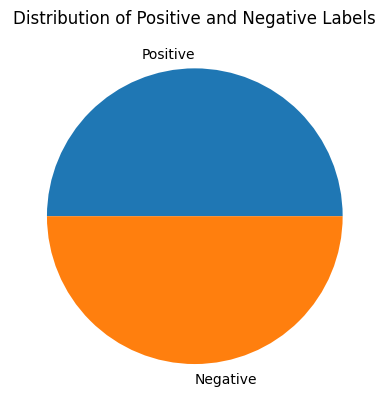

In [80]:
positive_count = Y_train.value_counts()[1]  # Access by label
negative_count = Y_train.value_counts()[0]  # Access by label
plt.pie(
    np.array([positive_count, negative_count]),
    labels=['Positive', 'Negative']
)
plt.title('Distribution of Positive and Negative Labels')
plt.show()